Preprocessing and EDA of the dataset

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set visualization styles
sns.set(style="whitegrid")

In [3]:
# Loading the dataset
df = pd.read_csv('flowers.csv')

# Displaying the first few rows of the dataset to understand its structure
print("Initial Dataset:")
print(df.head())

# Handling missing values
# Identifying missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Imputing missing values
# Imputing numerical columns with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# For categorical columns, imputing with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verifying if there are still missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# Separating features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalizing the features
scaler = StandardScaler()
# Normalizing numerical features only
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Converting categorical data to numerical data
categorical_columns = X.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)

# Converting categorical columns using Label Encoding
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Rechecking the changes
print("\nProcessed Features (First Few Rows):")
print(X.head())

Initial Dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           5.4          3.9           1.7          0.4  Iris-setosa
4           4.6          3.4           1.4          0.3  Iris-setosa

Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Missing Values After Imputation:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Categorical Columns:
Index([], dtype='object')

Processed Features (First Few Rows):
   sepal_length  sepal_width  petal_length  petal_width
0     -0.893414     0.997275     -1.313104    -1.291157
1     -1.130572    -0.158858     -1.313104    -1.291157
2     -1.367729     0.303595     -1.369099    -1.291157
3 

In [4]:
# Display basic information and statistics
print(df.info())
print(df.describe())
print(df['species'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  131 non-null    float64
 1   sepal_width   131 non-null    float64
 2   petal_length  131 non-null    float64
 3   petal_width   131 non-null    float64
 4   species       131 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.2+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    131.000000   131.000000    131.000000   131.000000
mean       5.853435     3.068702      3.745038     1.183206
std        0.846558     0.434136      1.792729     0.764416
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

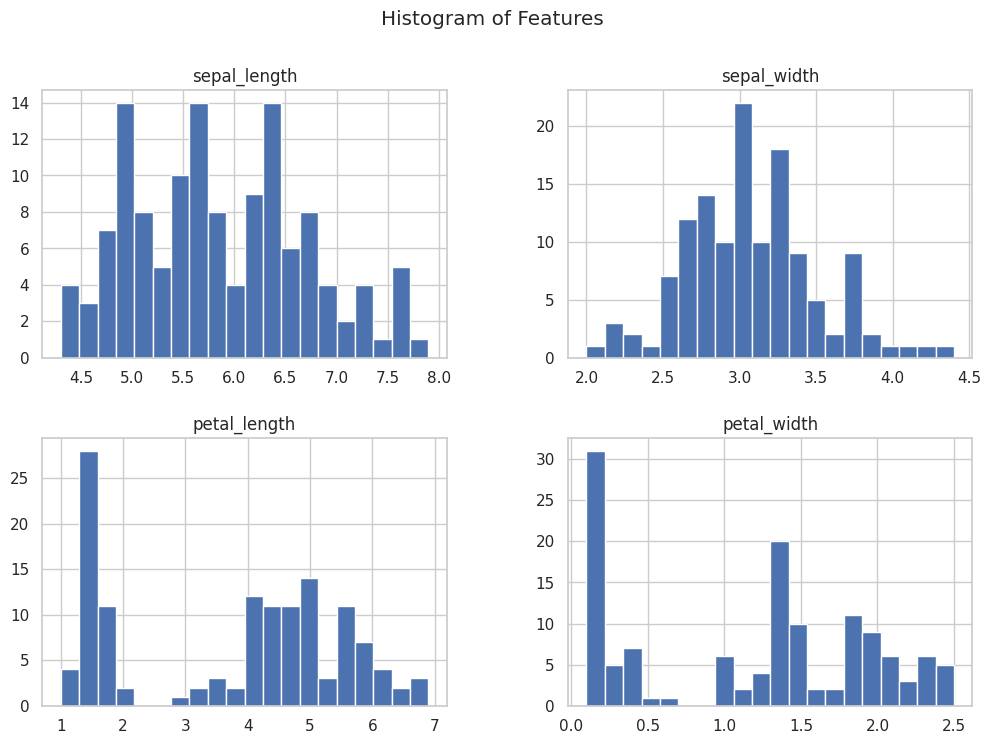

In [5]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Plot histograms of each feature
df[feature_names].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram of Features')
plt.show()

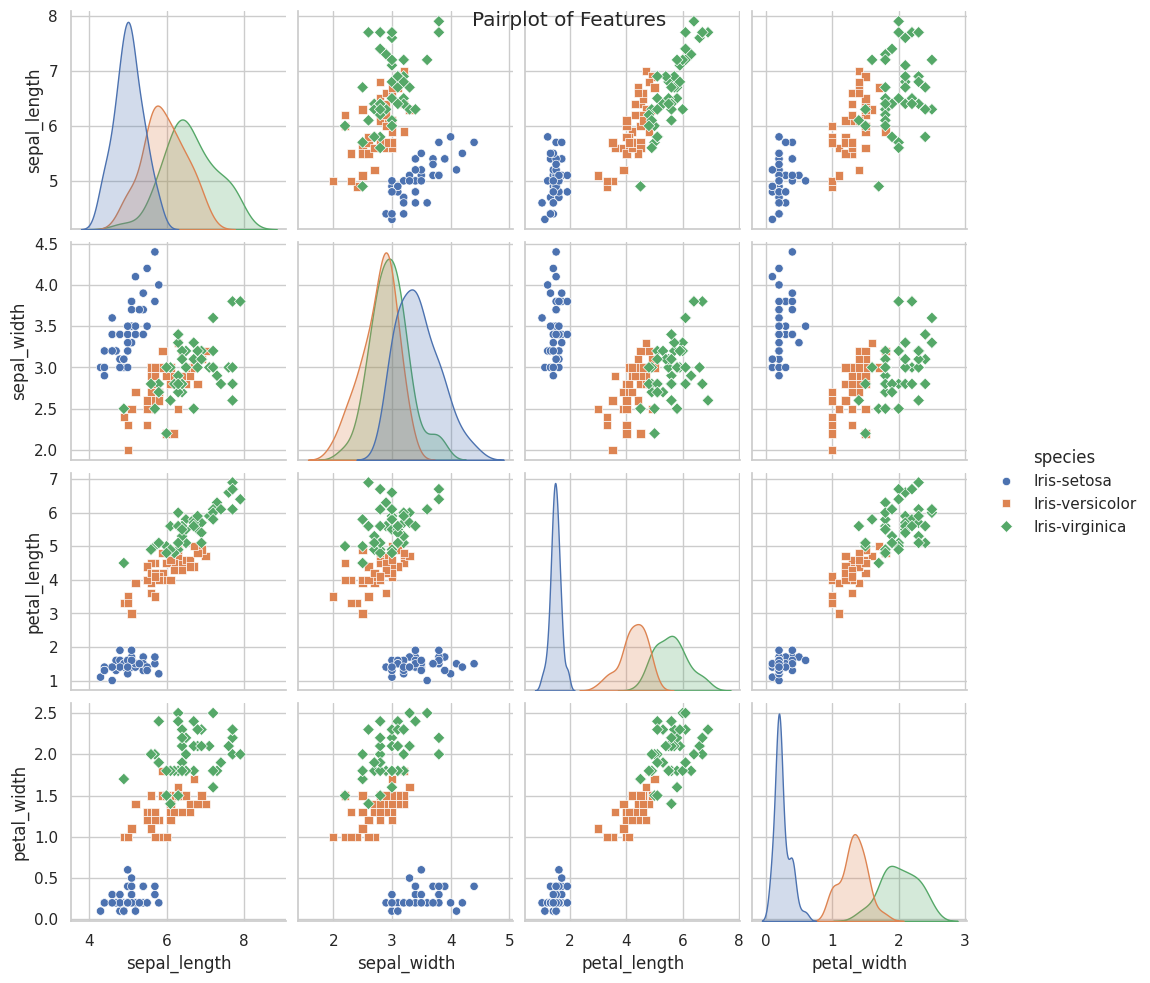

In [6]:
# Plot pairplot for feature visualization
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Features')
plt.show()

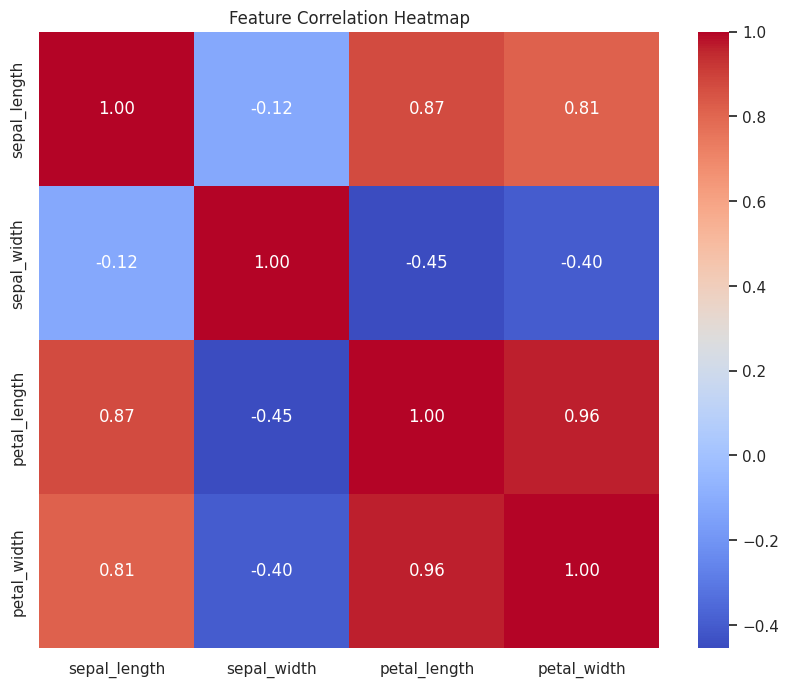

In [7]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[feature_names].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


IMPLEMENTING KNN CLASSIFICATION

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the k-NN classifier
k = 7  # You can choose different values for k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [10]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

Enter the starting value for k: 1
Enter the ending value for k: 25
Accuracy for k=1: 0.95

Classification Report for k=1:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.95        40
      macro avg       0.94      0.94      0.94        40
   weighted avg       0.95      0.95      0.95        40



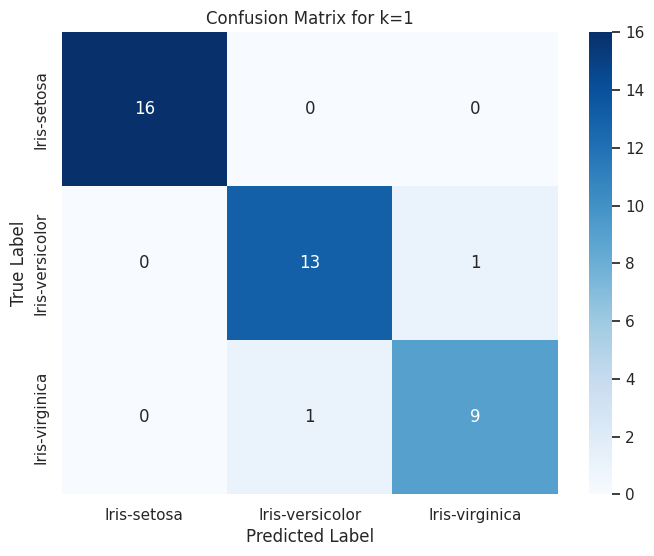

Accuracy for k=2: 0.95
Accuracy for k=3: 0.95
Accuracy for k=4: 0.95
Accuracy for k=5: 0.95
Accuracy for k=6: 0.95
Accuracy for k=7: 0.95
Accuracy for k=8: 0.95
Accuracy for k=9: 0.925
Accuracy for k=10: 0.975
Accuracy for k=11: 0.925
Accuracy for k=12: 0.95
Accuracy for k=13: 0.9

Classification Report for k=13:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      0.79      0.85        14
 Iris-virginica       0.75      0.90      0.82        10

       accuracy                           0.90        40
      macro avg       0.89      0.90      0.89        40
   weighted avg       0.91      0.90      0.90        40



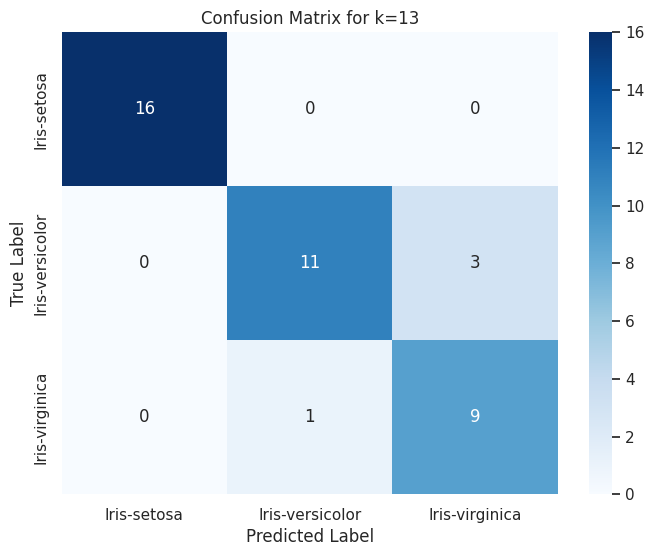

Accuracy for k=14: 0.925
Accuracy for k=15: 0.925
Accuracy for k=16: 0.925
Accuracy for k=17: 0.925
Accuracy for k=18: 0.925
Accuracy for k=19: 0.9
Accuracy for k=20: 0.925
Accuracy for k=21: 0.925
Accuracy for k=22: 0.925
Accuracy for k=23: 0.9
Accuracy for k=24: 0.925
Accuracy for k=25: 0.9

Classification Report for k=25:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      0.79      0.85        14
 Iris-virginica       0.75      0.90      0.82        10

       accuracy                           0.90        40
      macro avg       0.89      0.90      0.89        40
   weighted avg       0.91      0.90      0.90        40



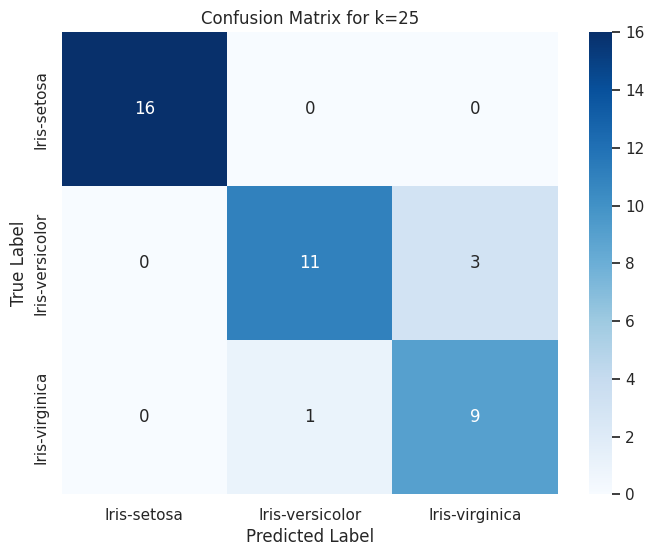

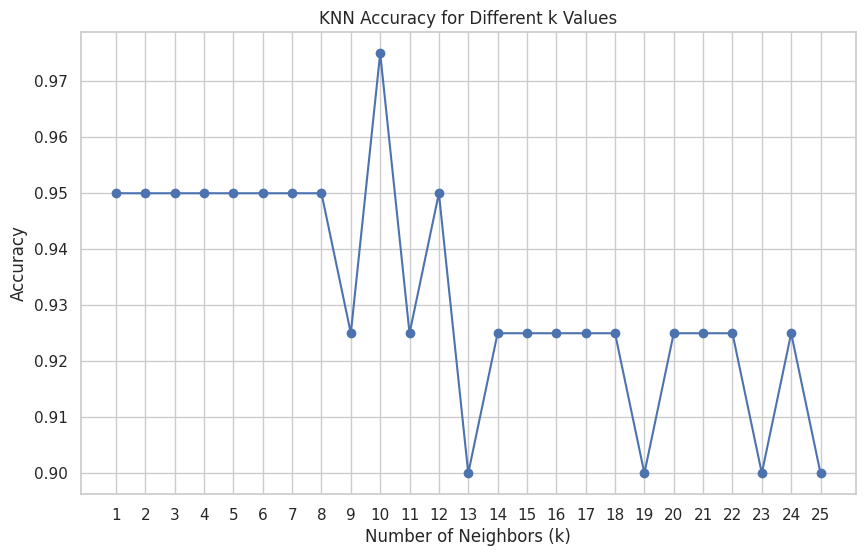

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import accuracy_score, classification_report, and confusion_matrix
# Train LinearSVC on original data
model_original = LinearSVC(random_state=42)
model_original.fit(X_train, y_train)

# Predictions and accuracy on original data
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train LinearSVC on scaled data
model_scaled = LinearSVC(random_state=42)
model_scaled.fit(X_train_scaled, y_train)

# Predictions and accuracy on scaled data
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Request user input for the range of k values
k_start = int(input("Enter the starting value for k: "))
k_end = int(input("Enter the ending value for k: "))
k_values = range(k_start, k_end + 1)

# List to store accuracy for each k
accuracies = []

# Evaluate KNN for each value of k
for k in k_values:
    # Initialize and fit the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy}")

    # Print classification report for selected values of k
    if k in [k_start, (k_start + k_end) // 2, k_end]:  # example to print for start, middle, and end k
        print(f"\nClassification Report for k={k}:")
        print(classification_report(y_test, y_pred))

        # Display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"Confusion Matrix for k={k}")
        plt.show()

# Plotting accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()


Detected a multiclass problem. Using one-vs-rest ROC approach.


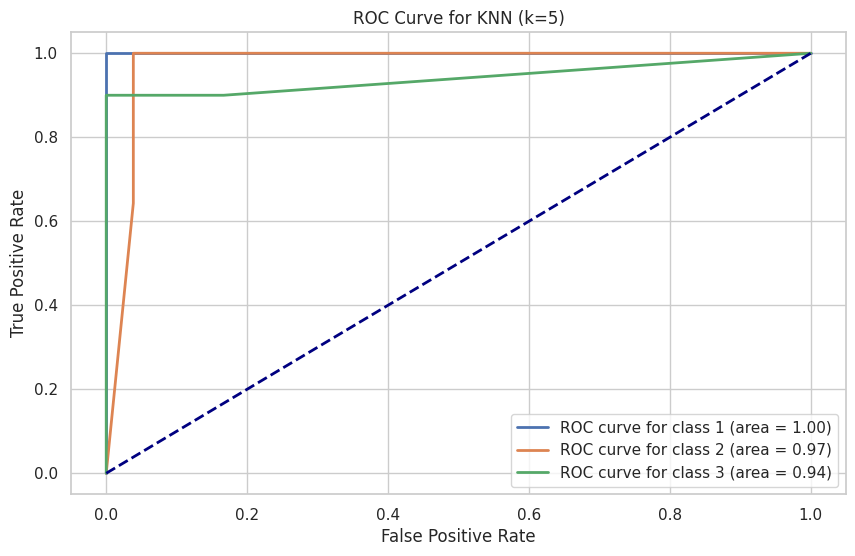

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Check if target variable is binary or multiclass
num_classes = len(y.unique())
if num_classes > 2:
    print("Detected a multiclass problem. Using one-vs-rest ROC approach.")

# Binarize the output labels for multiclass, or for binary directly
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_train_binarized = label_binarize(y_train, classes=np.unique(y))
if num_classes == 2:
    y_test_binarized = y_test_binarized.ravel()  # Flatten if binary

# Evaluate ROC and AUC for a specific k (e.g., k=5)
k = 5  # Choose a specific k value to evaluate
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred_proba = knn_model.predict_proba(X_test)

# Plot ROC Curve and calculate AUC
plt.figure(figsize=(10, 6))
if num_classes == 2:
    # For binary classification
    fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
else:
    # For multiclass classification, calculate ROC curve for each class
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"ROC curve for class {i+1} (area = {roc_auc:.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve for KNN (k={k})")
plt.legend(loc="lower right")
plt.show()


Enter the number of folds for cross-validation: 6
Enter the starting value for k (neighbors): 1
Enter the ending value for k (neighbors): 25
Results for k=1:
Mean Accuracy: 0.9318
Standard Deviation: 0.0347
Cross-Validation Scores: [0.90909091 0.95454545 0.90909091 0.90909091 0.90909091 1.        ]

Results for k=2:
Mean Accuracy: 0.9390
Standard Deviation: 0.0212
Cross-Validation Scores: [0.95454545 0.95454545 0.90909091 0.95454545 0.90909091 0.95238095]

Results for k=3:
Mean Accuracy: 0.9315
Standard Deviation: 0.0345
Cross-Validation Scores: [0.90909091 1.         0.90909091 0.90909091 0.90909091 0.95238095]

Results for k=4:
Mean Accuracy: 0.9466
Standard Deviation: 0.0312
Cross-Validation Scores: [0.95454545 1.         0.95454545 0.90909091 0.90909091 0.95238095]

Results for k=5:
Mean Accuracy: 0.9542
Standard Deviation: 0.0263
Cross-Validation Scores: [0.95454545 1.         0.95454545 0.90909091 0.95454545 0.95238095]

Results for k=6:
Mean Accuracy: 0.9542
Standard Deviation: 

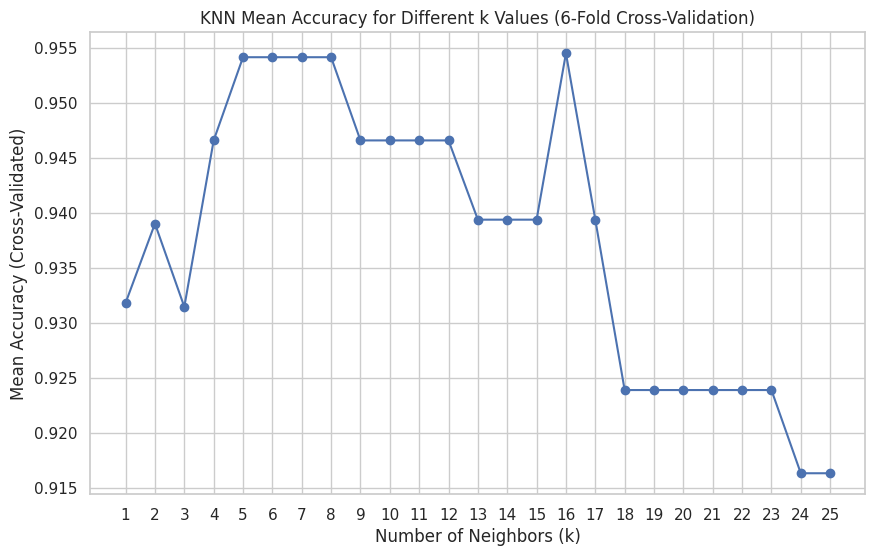

In [14]:
from sklearn.model_selection import cross_val_score

# Request user input for the number of folds in cross-validation
num_folds = int(input("Enter the number of folds for cross-validation: "))
k_start = int(input("Enter the starting value for k (neighbors): "))
k_end = int(input("Enter the ending value for k (neighbors): "))

# List to store mean accuracy for each k value
mean_accuracies = []

# Perform k-Fold Cross-Validation for each k value in the specified range
for k in range(k_start, k_end + 1):
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Cross-validate the model
    scores = cross_val_score(knn_model, X, y, cv=num_folds, scoring='accuracy')

    # Calculate mean accuracy and standard deviation
    mean_accuracy = np.mean(scores)
    std_dev = np.std(scores)
    mean_accuracies.append(mean_accuracy)

    # Print the results for each k
    print(f"Results for k={k}:")
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Standard Deviation: {std_dev:.4f}")
    print(f"Cross-Validation Scores: {scores}\n")

# Plot the mean accuracy for each k value
plt.figure(figsize=(10, 6))
plt.plot(range(k_start, k_end + 1), mean_accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Accuracy (Cross-Validated)")
plt.title(f"KNN Mean Accuracy for Different k Values ({num_folds}-Fold Cross-Validation)")
plt.xticks(range(k_start, k_end + 1))
plt.grid(True)
plt.show()


Initial Dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           5.4          3.9           1.7          0.4  Iris-setosa
4           4.6          3.4           1.4          0.3  Iris-setosa


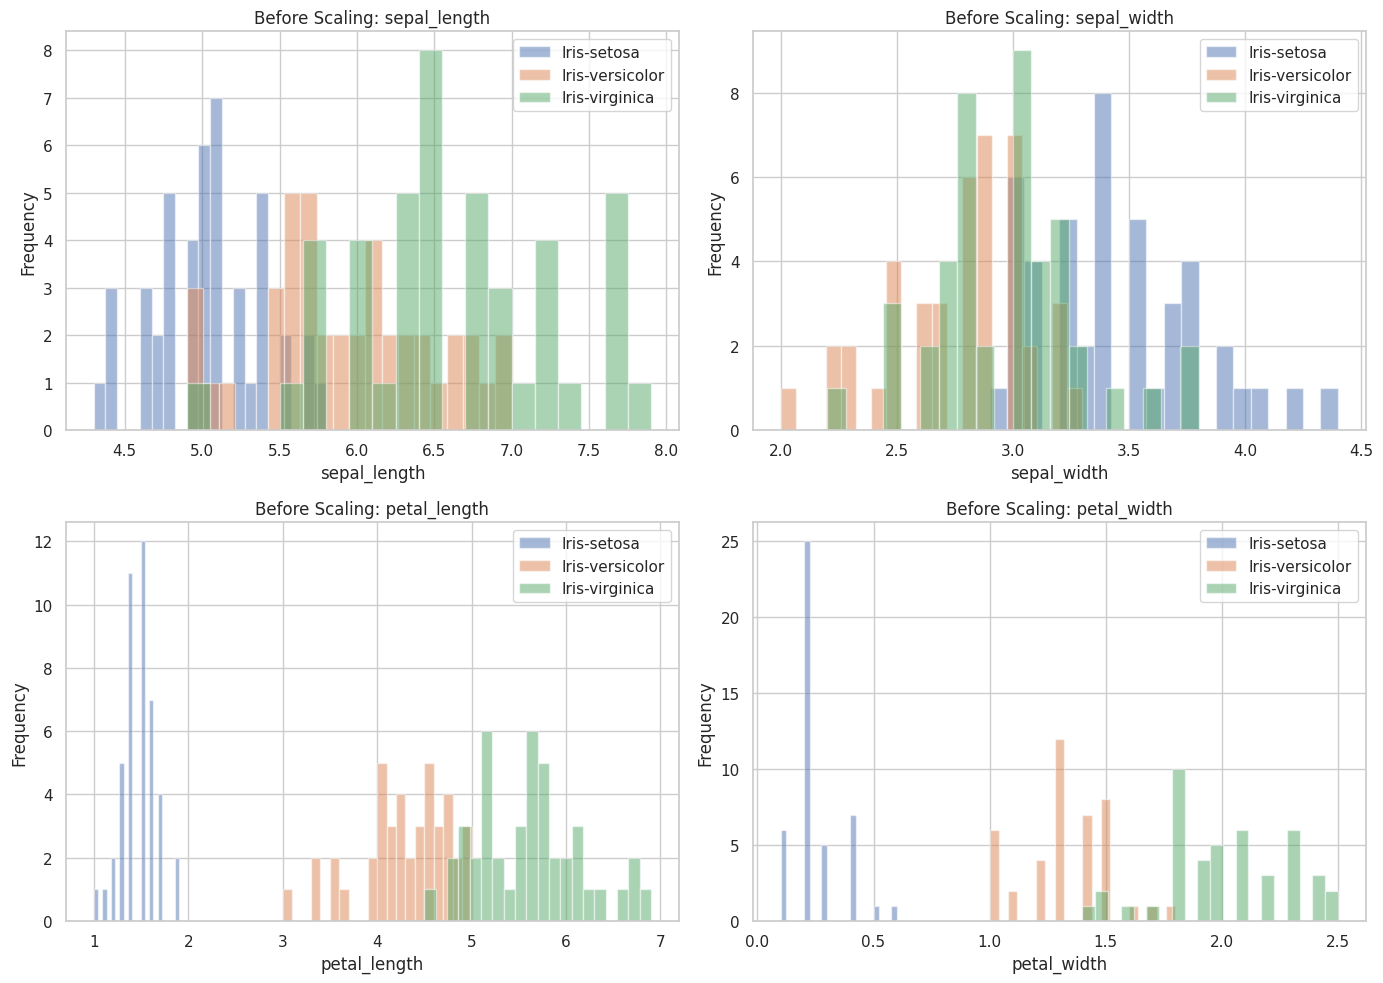

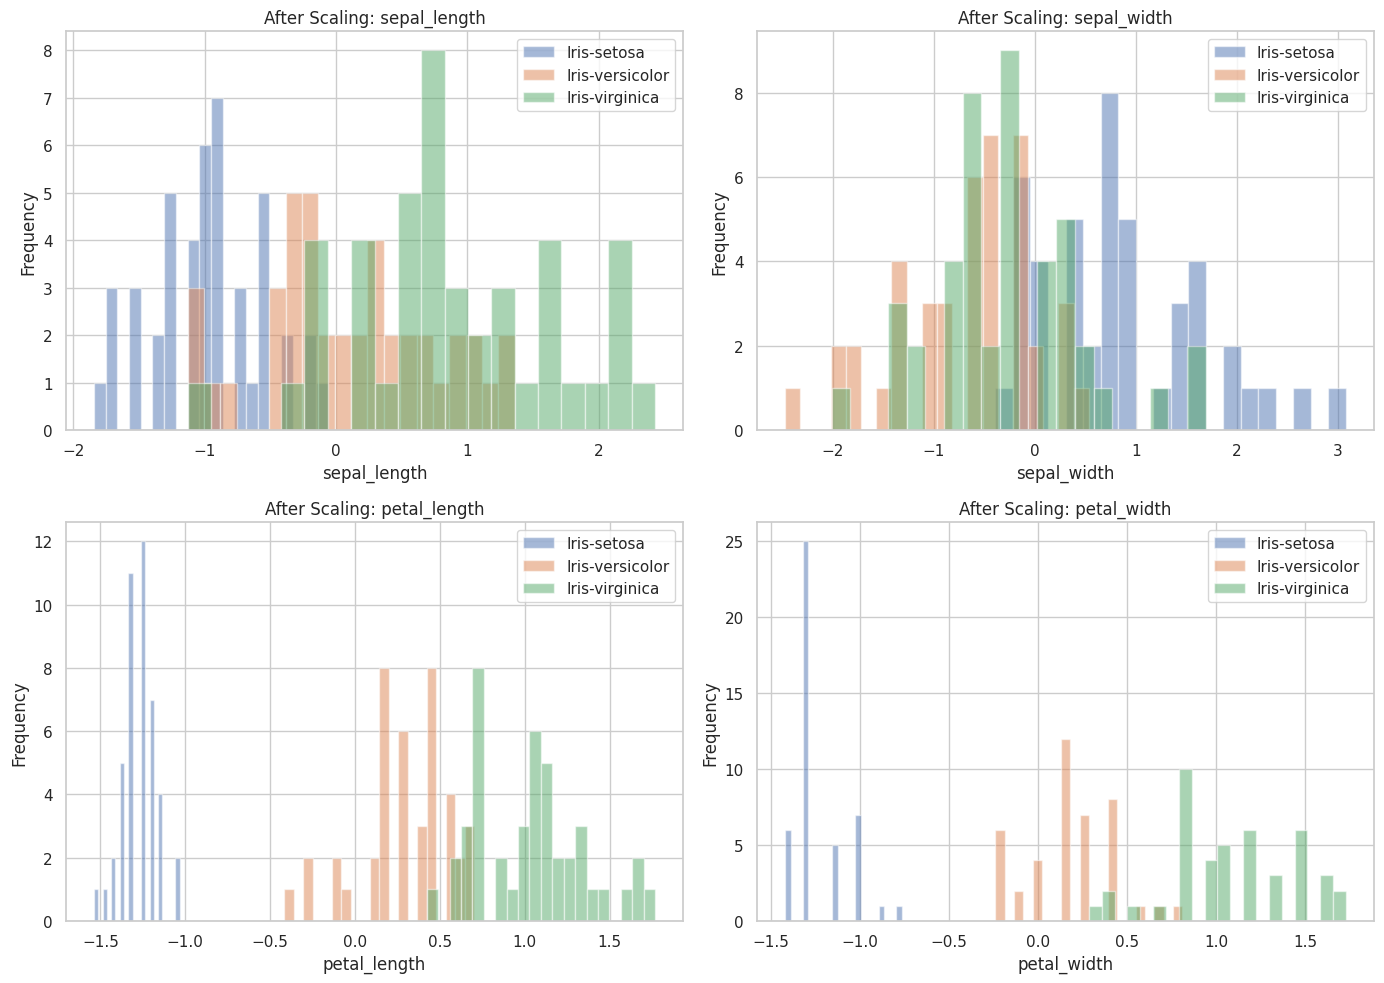

In [15]:
# Set visualization styles
sns.set(style="whitegrid")

# Load the flowers dataset
# Assuming the dataset has columns: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', and 'species'
df = pd.read_csv('flowers.csv')

# Display the first few rows of the dataset to understand its structure
print("Initial Dataset:")
print(df.head())

# Plot histograms of each feature before scaling
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(14, 10))
for feature in feature_names:
    plt.subplot(2, 2, feature_names.index(feature) + 1)  # Create a subplot for each feature
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        plt.hist(subset[feature], bins=20, alpha=0.5, label=species)

    plt.title(f'Before Scaling: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()  # Show the plot

# Standardize features
scaler = StandardScaler()
X = df[feature_names].values  # Select feature columns
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

# Convert scaled data back to DataFrame for visualization
df_scaled = pd.DataFrame(data=X_scaled, columns=feature_names)
df_scaled['species'] = df['species']  # Add the species column back for visualization

# Plot histograms of each feature after scaling
plt.figure(figsize=(14, 10))
for feature in feature_names:
    plt.subplot(2, 2, feature_names.index(feature) + 1)  # Create a subplot for each feature
    for species in df_scaled['species'].unique():
        subset = df_scaled[df_scaled['species'] == species]
        plt.hist(subset[feature], bins=20, alpha=0.5, label=species)

    plt.title(f'After Scaling: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()  # Show the plot


IMPLEMENTING LOGISTIC REGRESSION

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [37]:
# Binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [39]:
#L1 and L2 regularization loss functions
def l1_loss(weights, reg_lambda):
    return reg_lambda * np.sum(np.abs(weights))

def l2_loss(weights, reg_lambda):
    return reg_lambda * np.sum(weights ** 2)

In [40]:
# Logistic Regression class
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, threshold=0.5, regularization=None, reg_lambda=0.01):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.threshold = threshold
        self.regularization = regularization
        self.reg_lambda = reg_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def initialize_params(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_loss(self, y, y_pred):
        base_loss = binary_cross_entropy(y, y_pred)
        if self.regularization == 'l1':
            reg_loss = l1_loss(self.weights, self.reg_lambda)
        elif self.regularization == 'l2':
            reg_loss = l2_loss(self.weights, self.reg_lambda)
        else:
            reg_loss = 0
        return base_loss + reg_loss

    def gradient_descent(self, X, y, y_pred):
        n_samples = X.shape[0]
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)

        if self.regularization == 'l1':
            dw += self.reg_lambda * np.sign(self.weights)
        elif self.regularization == 'l2':
            dw += 2 * self.reg_lambda * self.weights

        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        n_features = X.shape[1]
        self.initialize_params(n_features)

        for i in range(self.iterations):
            model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(model)
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
            self.gradient_descent(X, y, y_pred)

    def predict_proba(self, X):
        linear_combination = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_combination)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return [1 if prob > self.threshold else 0 for prob in y_pred_proba]

    def plot_loss_curve(self):
        plt.plot(self.loss_history)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Loss Curve")
        plt.show()

In [43]:
# Evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

Enter learning rate (e.g., 0.01): 0.01
Enter number of iterations (e.g., 1000): 1000
Enter threshold for classification (e.g., 0.5): 0.5
Enter regularization type (None, 'l1', 'l2'): l1


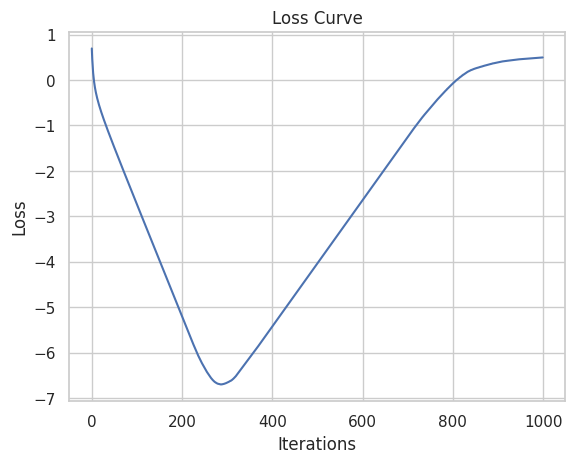

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3206
Precision: 0.1028
Recall: 0.3206
F1 Score: 0.1557


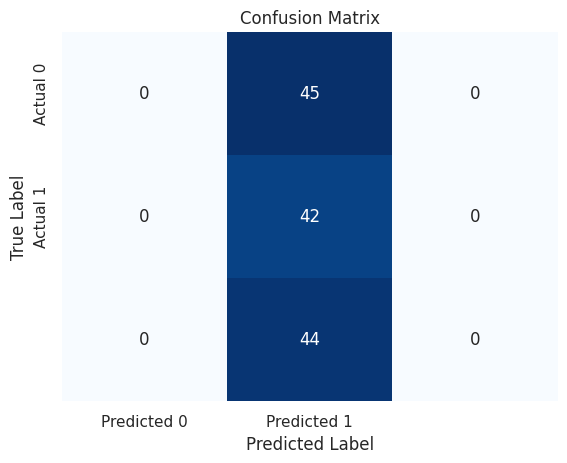

In [44]:
# Main execution
if __name__ == "__main__":
    # Get model parameters from user input
    learning_rate = float(input("Enter learning rate (e.g., 0.01): "))
    iterations = int(input("Enter number of iterations (e.g., 1000): "))
    threshold = float(input("Enter threshold for classification (e.g., 0.5): "))
    regularization = input("Enter regularization type (None, 'l1', 'l2'): ").lower()
    reg_lambda = 0.01 if regularization != 'none' else 0.0  # Set lambda only if regularization is used

    if regularization == 'none':
        regularization = None

    # Initialize and train model with chosen parameters
    model = LogisticRegression(
        learning_rate=learning_rate,
        iterations=iterations,
        threshold=threshold,
        regularization=regularization,
        reg_lambda=reg_lambda
    )
    model.fit(X, y)

    # Plot loss curve
    model.plot_loss_curve()

    # Make predictions
    y_pred = model.predict(X)

    # Evaluate model
    evaluate_model(y, y_pred)

IMPLEMENTING SVM CLASSIFIER

A support vector machine (SVM) is a supervised machine learning algorithm that classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space.

In [45]:
from sklearn.svm import LinearSVC, SVC
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
# 1. Train LinearSVC on original data
model_original = LinearSVC(random_state=42)
model_original.fit(X_train, y_train)

# Predictions and accuracy on original data
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

In [47]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train LinearSVC on scaled data
model_scaled = LinearSVC(random_state=42)
model_scaled.fit(X_train_scaled, y_train)

LinearSVC(random_state=42)

In [48]:
# Predictions and accuracy on scaled data
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Cross-validation to check model performance
cv_scores_original = cross_val_score(model_original, X, y, cv=5)
cv_scores_scaled = cross_val_score(model_scaled, X_scaled, y, cv=5)

print(f"Cross-validated accuracy on original data: {np.mean(cv_scores_original):.2f}")
print(f"Cross-validated accuracy on scaled data: {np.mean(cv_scores_scaled):.2f}")

Cross-validated accuracy on original data: 0.97
Cross-validated accuracy on scaled data: 0.93


In [49]:
# Function to plot decision boundaries (same as before)
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    # Create grid_points with the same number of features as the training data
    num_features = X.shape[1]
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Define grid_points_for_prediction here, based on the number of features
    n_features_expected = model.coef_.shape[1] if hasattr(model, 'coef_') else X.shape[1]

    if n_features_expected > 2:
        # Pad the grid points with zeros for the remaining features
        grid_points_for_prediction = np.pad(grid_points, ((0, 0), (0, n_features_expected - 2)), 'constant', constant_values=0)
    else:
        grid_points_for_prediction = grid_points

    # Predict using the modified grid points
    Z = model.predict(grid_points_for_prediction)

    # Convert predictions to numerical if they are not
    if isinstance(Z[0], str):  # Check if predictions are strings
        unique_labels = np.unique(Z)
        label_mapping = {label: i for i, label in enumerate(unique_labels)}
        Z = np.array([label_mapping[label] for label in Z])

    Z = Z.reshape(xx.shape)

    # Convert target labels to numerical for color mapping
    if isinstance(y[0], str):  # Check if target labels are strings
        unique_labels_y = np.unique(y)
        label_mapping_y = {label: i for i, label in enumerate(unique_labels_y)}
        y_numeric = np.array([label_mapping_y[label] for label in y])

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y_numeric if isinstance(y[0], str) else y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

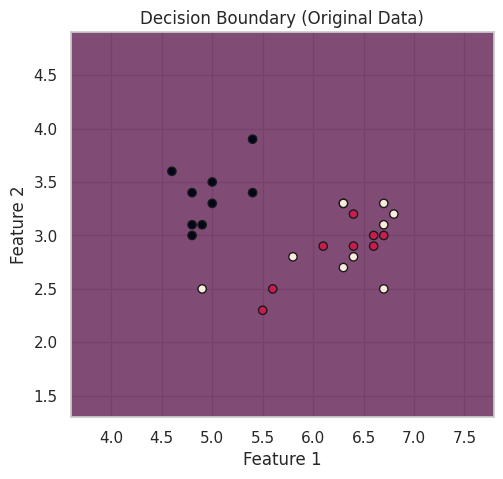

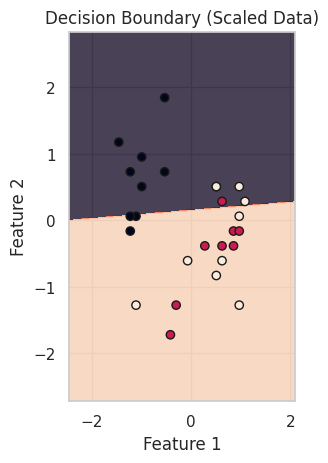

In [50]:
# Plotting decision boundaries for original and scaled data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(X_test, y_test, model_original, f'Decision Boundary (Original Data)' )

plt.subplot(1, 2, 2)
plot_decision_boundary(X_test_scaled, y_test, model_scaled, f'Decision Boundary (Scaled Data)')

Enter the kernel type (linear/rbf/poly): poly
Enter C values (comma-separated): 0.1, 100
Enter gamma values (comma-separated): 0.1, 100
Kernel: poly, C: 0.1, gamma: 0.1, Accuracy: 0.59
Kernel: poly, C: 0.1, gamma: 100.0, Accuracy: 0.96
Kernel: poly, C: 100.0, gamma: 0.1, Accuracy: 0.96
Kernel: poly, C: 100.0, gamma: 100.0, Accuracy: 0.96


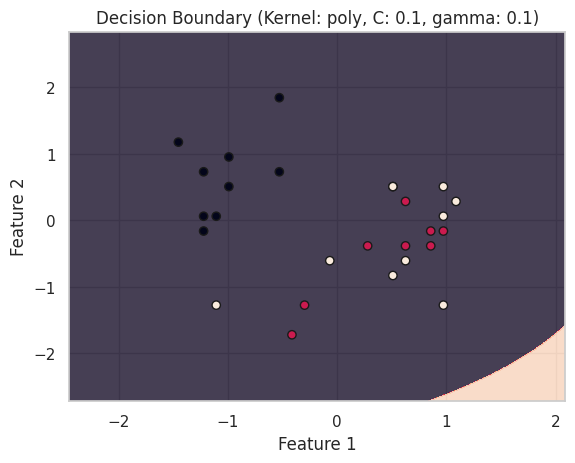

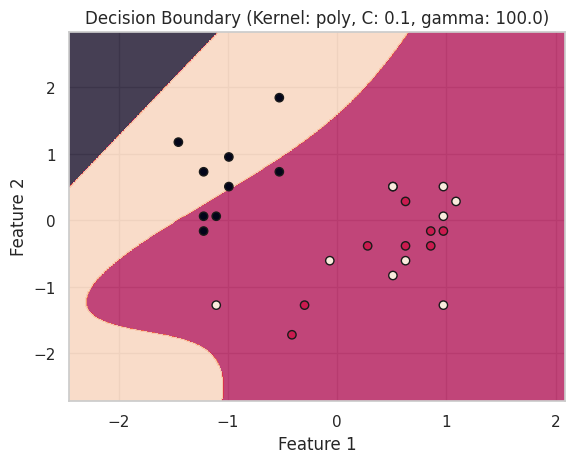

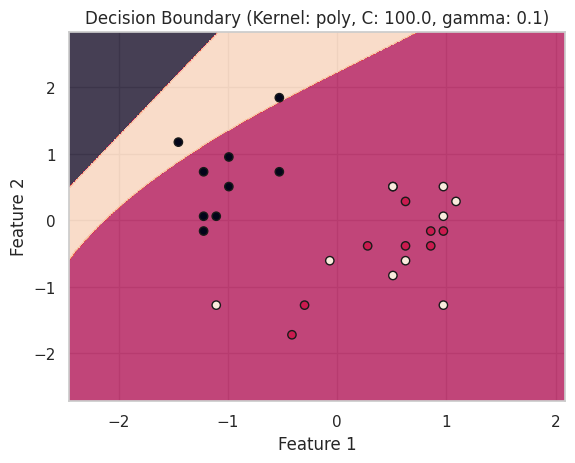

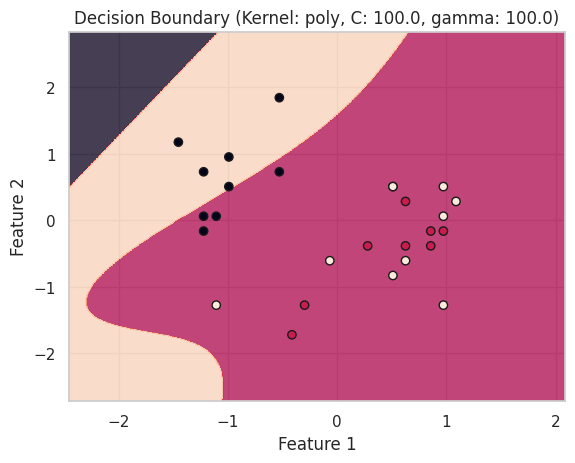

In [53]:
# User input for kernel, C values, and gamma values
kernel = input("Enter the kernel type (linear/rbf/poly): ")

# User input for C values
C_values_input = input("Enter C values (comma-separated): ")
C_values = [float(value) for value in C_values_input.split(',')]

# User input for gamma values (only applicable for certain kernels)
if kernel != 'linear':
    gamma_values_input = input("Enter gamma values (comma-separated): ")
    gamma_values = [float(value) for value in gamma_values_input.split(',')]
else:
    gamma_values = [None]  # No gamma values for linear kernel

def grid_search_svm(X_train, y_train, X_test, y_test, kernel, C_values, gamma_values):
    results = {}
    for C in C_values:
        for gamma in gamma_values:
            model = SVC(kernel=kernel, C=C, gamma=gamma if gamma is not None else 'scale', random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results[(C, gamma)] = accuracy
            print(f'Kernel: {kernel}, C: {C}, gamma: {gamma}, Accuracy: {accuracy:.2f}')
    return results

# Run the grid search with user-provided values
results = grid_search_svm(X_train_scaled, y_train, X_test_scaled, y_test, kernel, C_values, gamma_values)

# Plot decision boundaries for different SVM models trained with different parameters
for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel=kernel, C=C, gamma=gamma if gamma is not None else 'scale', random_state=42)
        model.fit(X_train_scaled, y_train)

        plt.figure()
        plot_decision_boundary(X_test_scaled, y_test, model, f'Decision Boundary (Kernel: {kernel}, C: {C}, gamma: {gamma})')